In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


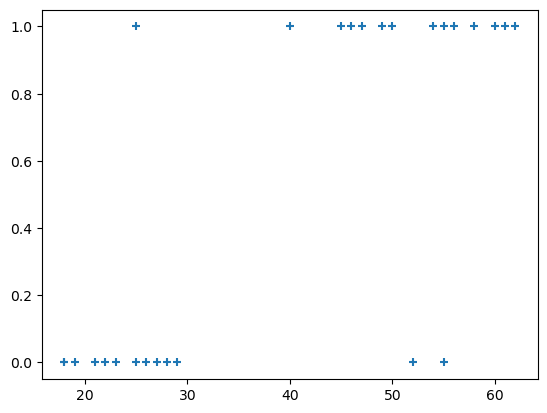

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+')

In [6]:
df.shape

(27, 2)

In [21]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1,random_state=20)

In [37]:
x_test

,age
13,29
4,46
1,25


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
model.predict(x_test)

array([0, 1, 0], dtype=int64)

In [67]:
model.score(x_test,y_test)

1.0

In [68]:
model.predict([[23],[45],[77],[19]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0], dtype=int64)

### HR Analytics

In [70]:
df1=pd.read_csv('HR_comma_sep.csv')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
df1.shape

(14999, 10)

In [75]:
left=df1[df1.left==1]

In [76]:
left.shape

(3571, 10)

In [85]:
retain=df1[df1.left==0]

In [86]:
retain.shape

(11428, 10)

In [99]:
df2=df1.iloc[:,:-2]

In [100]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [102]:
df2.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


In [108]:
import seaborn as sns

<Axes: xlabel='salary', ylabel='count'>

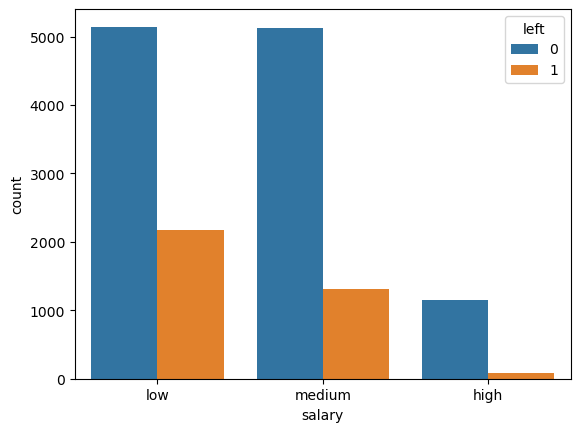

In [112]:
sns.countplot(data=df1,x='salary',hue='left')

Above bar chart shows employees with high salaries are likely to not leave the company

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

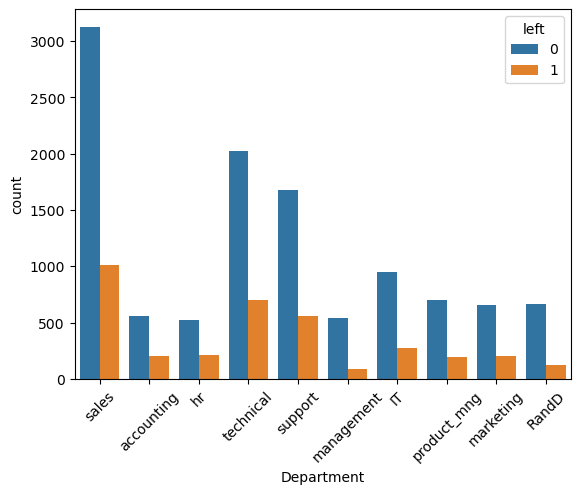

In [115]:
sns.countplot(data=df1,x='Department',hue='left')
plt.xticks(rotation=45)

In [124]:
sub=df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [125]:
sub.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [128]:
dummies=pd.get_dummies(df1.salary,drop_first=True).astype('int')

In [130]:
df=pd.concat([sub,dummies],axis='columns')

In [135]:
df.drop('salary',axis='columns',inplace=True)

In [136]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [143]:
x=df

In [144]:
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [145]:
y=df1.left

In [147]:
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=20)

In [150]:
m=LogisticRegression()

In [151]:
m.fit(X_train,y_train)

LogisticRegression()

In [152]:
m.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [154]:
m.score(X_test,y_test)

0.7815555555555556